---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_blends.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## 📈 Blends of plots.

In [1]:
# | export
"""Blends of plotting functions."""

import matplotlib.pyplot as plt
import pandas as pd

import roux.lib.df as rd #noqa

from roux.viz.figure import get_ax

def plot_ranks(
    data: pd.DataFrame,
    kws_plot: dict,
    col: str,
    colid: str,
    col_label: str = None,
    xlim_min: float = -20,
    ax=None,
):
    """
    Plot ranks.
    """
    if col_label is None:
        col_label = colid
    if ax is None:
        ax = plt.gca()
    from roux.viz.scatter import plot_ranks

    ax, data1 = plot_ranks(
        data,
        col=col,
        colid=colid,
        ranks_on="x",
        ascending=False,
        line=True,
        show_topn=kws_plot["topn"],
        ax=ax,
    )
    from roux.viz.annot import annot_side_curved

    ax = annot_side_curved(
        data1.sort_values("rank").head(kws_plot["topn"]),
        colx="rank",
        coly=col,
        x=ax.get_xlim()[1],  # *0.3,
        ylim=[
            ax.get_ylim()[0]
            + ((ax.get_ylim()[1] - ax.get_ylim()[0]) * kws_plot["ylim_fr"][0]),
            ax.get_ylim()[0]
            + ((ax.get_ylim()[1] - ax.get_ylim()[0]) * kws_plot["ylim_fr"][1]),
        ],
        col_label=col_label,
        ax=ax,
        ha="right",
        **kws_plot["annot_side_curved"],
    )
    ax.set(
        xlim=[
            xlim_min,
            ax.get_xlim()[1],
        ]
    )
    ax.set(xticks=[1, ax.get_xticks()[ax.get_xticks() < ax.get_xlim()[1]].max()])
    from roux.viz.ax_ import format_ax

    format_ax()
    return ax

def plot_dists_by_bins(
    data,
    x,
    y, # bin
    bins,
    show_corr=False, ## also takes kws
    corr_offs=[0,0],
    ax=None,
    **kws_plot_dists,
    ):
    ## binning
    data=(
        data
        .log.dropna(subset=[x,y])
        .rd.get_bins(
            col=y,
            bins=bins,
            dtype='float',
        )
        .sort_values(f"{y} bin",ascending=False)
        .astype(
            {f"{y} bin":str}
        )
    )
    # if kws_plot_dists.get('order',None) is None:
    #     kws_plot_dists['order']

    from roux.viz.dist import plot_dists
    ax=plot_dists(
        data,
        x=x,
        y=f"{y} bin",
        showfliers=False,
        
        ax=get_ax(ax),
        **kws_plot_dists,
    )
    if show_corr!=False:
        if show_corr==True:
            kws_show_corr={}
        assert isinstance(kws_show_corr,dict)
        from roux.viz.annot import show_scatter_stats
        show_scatter_stats(
            ax=ax,
            data=data,
            x=x,
            y=y,
            **{
                **dict(
                    z=None,
                    method='spearman',
                    
                    show_n=False,
                    show_p=False,
                    resample=True,
                    
                    kws_set_label=dict(
                        x=-0.25+corr_offs[0],
                        y=-0.125+corr_offs[1],
                        ha='center',
                        va='center',
                        linespacing=0.75,
                    ),
                ),
                **kws_show_corr,
            },
        )
    ax.set(
        ylabel=y,
    )
    return ax

In [2]:
import seaborn as sns
data=sns.load_dataset('iris')
# df1=df1.loc[df1['species'].isin(['setosa','virginica']),:]
data['id']=range(len(data))
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0


In [3]:
data['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [4]:
kws_plot=dict(
    plot=dict(    
        x='sepal_length',
        y='petal_length',
        colindex='id',
        bins=[0,5,10],
        show_corr=True, ## also takes kws
    )
)

/home/rdandage/Documents/work/roux/roux/viz/ax_.py:340: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = getattr(ax, f"set_{k}")(


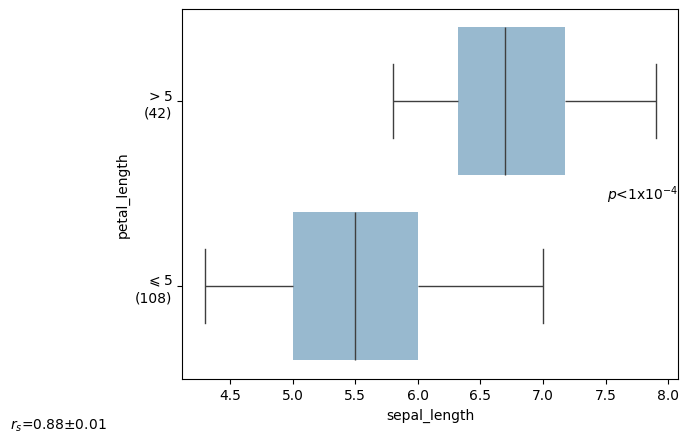

In [5]:
# from roux.viz.blends import plot_dists_by_bins
ax=plot_dists_by_bins(
    data,
    **kws_plot['plot']
    )

In [6]:
from roux.workflow.io import get_source_path,to_mod
to_mod(get_source_path())

/home/rdandage/Documents/work/00_parcansplice/.venv/lib/python3.12/site-packages/nbdev/doclinks.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources,importlib



'../roux/viz/blends.py'

### Documentation
[`roux.viz.blends`](https://github.com/rraadd88/roux#module-rouxvizline)